# IPL Win Predictor

Group Members: <br>
Ashitosh Phadatare : 211AI007<br>
Aaryan Nijhawan    : 211AI002<br>
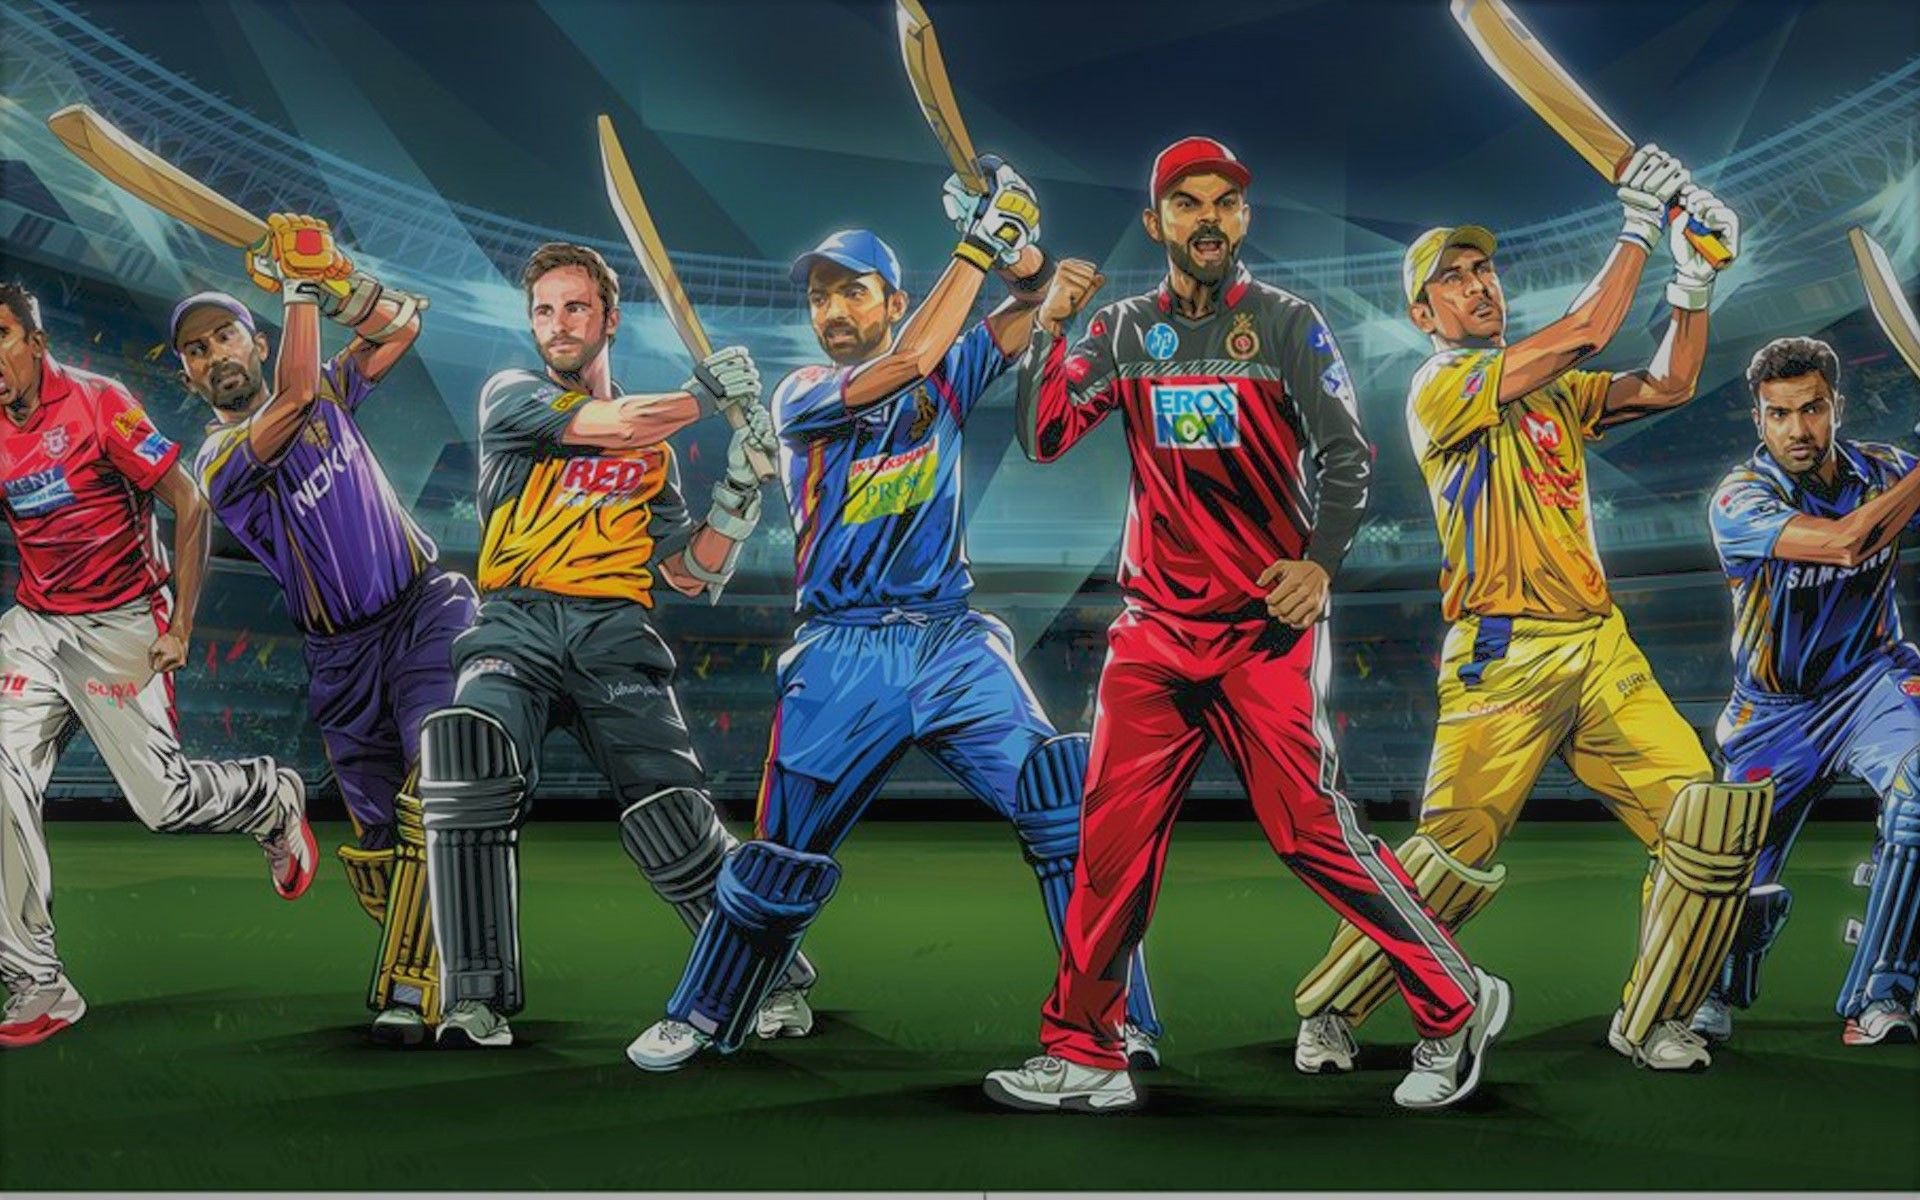


In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

In [2]:
match = pd.read_csv("matches.csv")
delivery = pd.read_csv("deliveries.csv")

In [3]:
match.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
match.shape

(756, 18)

In [5]:
delivery.shape

(179078, 21)

In [6]:
total_score_df = delivery.groupby(['match_id' , 'inning']).sum()['total_runs'].reset_index()
total_score_df['total_runs'] = total_score_df['total_runs'] + 1

C:\Users\Ashitosh\AppData\Local\Temp\ipykernel_15880\2512723776.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total_score_df = delivery.groupby(['match_id' , 'inning']).sum()['total_runs'].reset_index()


In [7]:
total_score_df

,match_id,inning,total_runs
0,1,1,208
1,1,2,173
2,2,1,185
3,2,2,188
4,3,1,184
...,...,...,...
1523,11413,2,171
1524,11414,1,156
1525,11414,2,163
1526,11415,1,153


In [8]:
total_score_df = total_score_df[total_score_df['inning'] == 1]

In [9]:
total_score_df

,match_id,inning,total_runs
0,1,1,208
2,2,1,185
4,3,1,184
6,4,1,164
8,5,1,158
...,...,...,...
1518,11347,1,144
1520,11412,1,137
1522,11413,1,172
1524,11414,1,156


In [10]:
match = match.merge(total_score_df[['match_id' , 'total_runs']] , left_on = 'id' , right_on = 'match_id' )

In [11]:
match['team1'].value_counts()

Mumbai Indians                 101
Kings XI Punjab                 91
Chennai Super Kings             89
Royal Challengers Bangalore     85
Kolkata Knight Riders           83
Delhi Daredevils                72
Rajasthan Royals                67
Sunrisers Hyderabad             63
Deccan Chargers                 43
Pune Warriors                   20
Gujarat Lions                   14
Rising Pune Supergiant           8
Kochi Tuskers Kerala             7
Rising Pune Supergiants          7
Delhi Capitals                   6
Name: team1, dtype: int64

In [12]:
teams = [
    'Mumbai Indians' , 
    "PKings XI Punjab" , 
    "Chennai Super Kings" , 
    "Royal Challengers Bangalore" , 
    "Kolkata Knight Riders" , 
    "Rajasthan Royals" , 
    "Delhi Capitals",
    "Sunrisers Hyderabad"
]

In [13]:
match['team1'] = match['team1'].str.replace("Delhi Daredevils" , "Delhi Capitals")
match['team2'] = match['team2'].str.replace("Delhi Daredevils" , "Delhi Capitals")

match['team1'] = match['team1'].str.replace("Deccan Chargers" , "Sunrisers Hyderabad")
match['team2'] = match['team2'].str.replace("Deccan Chargers" , "Sunrisers Hyderabad")


In [14]:
match = match[match['team1'].isin(teams)]
match = match[match['team2'].isin(teams)]

In [15]:
match = match[match['dl_applied'] == 0]

In [16]:
match['dl_applied'].sum()

0

In [17]:
match = match[['match_id' , 'city' , 'winner' , 'total_runs' ]]

In [18]:
match

,match_id,city,winner,total_runs
0,1,Hyderabad,Sunrisers Hyderabad,208
4,5,Bangalore,Royal Challengers Bangalore,158
6,7,Mumbai,Mumbai Indians,179
9,10,Mumbai,Mumbai Indians,159
11,12,Bangalore,Mumbai Indians,143
...,...,...,...,...
751,11347,Mumbai,Mumbai Indians,144
752,11412,Chennai,Mumbai Indians,137
753,11413,Visakhapatnam,Delhi Capitals,172
754,11414,Visakhapatnam,Chennai Super Kings,156


In [19]:
delivery_df = match.merge(delivery , on = 'match_id')

In [20]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
0,1,Hyderabad,Sunrisers Hyderabad,208,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,Hyderabad,Sunrisers Hyderabad,208,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,Hyderabad,Sunrisers Hyderabad,208,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,Hyderabad,Sunrisers Hyderabad,208,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,Hyderabad,Sunrisers Hyderabad,208,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112351,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,0,0,0,1,0,1,NaN,NaN,NaN
112352,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,0,0,0,2,0,2,NaN,NaN,NaN
112353,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
112354,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [21]:
delivery_df = delivery_df[delivery_df['inning'] == 2] 

In [22]:
delivery_df.shape

(54325, 24)

In [23]:
delivery_df['current_score'] = delivery_df.groupby('match_id').cumsum()['total_runs_y']

C:\Users\Ashitosh\AppData\Local\Temp\ipykernel_15880\3025607697.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.cumsum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  delivery_df['current_score'] = delivery_df.groupby('match_id').cumsum()['total_runs_y']
C:\Users\Ashitosh\AppData\Local\Temp\ipykernel_15880\3025607697.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['current_score'] = delivery_df.groupby('match_id').cumsum()['total_runs_y']


In [24]:
delivery_df['runs_left'] = delivery_df['total_runs_x'] - delivery_df['current_score'] + 1

C:\Users\Ashitosh\AppData\Local\Temp\ipykernel_15880\2144281317.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['runs_left'] = delivery_df['total_runs_x'] - delivery_df['current_score'] + 1


In [25]:
delivery_df['balls_left'] = 126 - (delivery_df['over']*6 + delivery_df['ball'])

C:\Users\Ashitosh\AppData\Local\Temp\ipykernel_15880\517047302.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['balls_left'] = 126 - (delivery_df['over']*6 + delivery_df['ball'])


In [26]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
125,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,1,0,1,NaN,NaN,NaN,1,208,119
126,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,NaN,1,208,118
127,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,NaN,1,208,117
128,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,2,0,2,NaN,NaN,NaN,3,206,116
129,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,4,0,4,NaN,NaN,NaN,7,202,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112351,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,1,0,1,NaN,NaN,NaN,152,2,4
112352,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,2,0,2,NaN,NaN,NaN,154,0,3
112353,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,1,0,1,SR Watson,run out,KH Pandya,155,-1,2
112354,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,2,0,2,NaN,NaN,NaN,157,-3,1


In [27]:
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].fillna("0")
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].apply(lambda x : x if x == "0" else "1")
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].astype('int')
wickets = delivery_df.groupby('match_id').cumsum()['player_dismissed'].values
delivery_df['wickets'] = 10- wickets
delivery_df.head(50)

C:\Users\Ashitosh\AppData\Local\Temp\ipykernel_15880\2069537016.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['player_dismissed'] = delivery_df['player_dismissed'].fillna("0")
C:\Users\Ashitosh\AppData\Local\Temp\ipykernel_15880\2069537016.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['player_dismissed'] = delivery_df['player_dismissed'].apply(lambda x : x if x == "0" else "1")
C:\Users\Ashitosh\AppData\Local\Temp\ipykernel_15880\2069537016.py:3: SettingWithCopyWarning: 


,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets
125,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,0,1,0,NaN,NaN,1,208,119,10
126,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,208,118,10
127,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,208,117,10
128,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,2,0,2,0,NaN,NaN,3,206,116,10
129,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,4,0,4,0,NaN,NaN,7,202,115,10
130,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,6,Mandeep Singh,...,4,0,4,0,NaN,NaN,11,198,114,10
131,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,2,1,CH Gayle,...,0,0,0,0,NaN,NaN,11,198,113,10
132,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,2,2,CH Gayle,...,0,0,0,0,NaN,NaN,11,198,112,10
133,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,2,3,CH Gayle,...,1,0,1,0,NaN,NaN,12,197,111,10
134,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,2,4,Mandeep Singh,...,0,0,0,0,NaN,NaN,12,197,110,10


In [28]:
# finding the current runrate;
# current run rate = currentscore / overs
delivery_df['crr'] = (delivery_df['current_score'] * 6) / (120 - delivery_df['balls_left'] )
delivery_df['rrr'] = (delivery_df['runs_left'] * 6)/ (delivery_df['balls_left'] )
delivery_df

C:\Users\Ashitosh\AppData\Local\Temp\ipykernel_15880\2584995571.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['crr'] = (delivery_df['current_score'] * 6) / (120 - delivery_df['balls_left'] )
C:\Users\Ashitosh\AppData\Local\Temp\ipykernel_15880\2584995571.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['rrr'] = (delivery_df['runs_left'] * 6)/ (delivery_df['balls_left'] )


,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets,crr,rrr
125,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,0,NaN,NaN,1,208,119,10,6.000000,10.487395
126,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,NaN,NaN,1,208,118,10,3.000000,10.576271
127,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,NaN,NaN,1,208,117,10,2.000000,10.666667
128,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,2,0,NaN,NaN,3,206,116,10,4.500000,10.655172
129,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,4,0,NaN,NaN,7,202,115,10,8.400000,10.539130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112351,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,1,0,NaN,NaN,152,2,4,5,7.862069,3.000000
112352,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,2,0,NaN,NaN,154,0,3,5,7.897436,0.000000
112353,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,1,1,run out,KH Pandya,155,-1,2,4,7.881356,-3.000000
112354,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,2,0,NaN,NaN,157,-3,1,4,7.915966,-18.000000


In [29]:
delivery_df['inning'].value_counts() 

2    54325
Name: inning, dtype: int64

In [30]:
def result(row):
    return 1 if row['batting_team'] == row['winner'] else 0

In [31]:
delivery_df['result'] = delivery_df.apply(result , axis = 1)

C:\Users\Ashitosh\AppData\Local\Temp\ipykernel_15880\26678438.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['result'] = delivery_df.apply(result , axis = 1)


In [32]:
delivery_df.head(1)


,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets,crr,rrr,result
125,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,NaN,NaN,1,208,119,10,6.0,10.487395,0


In [33]:
# extracting the required columns 
final_df = delivery_df[['batting_team' , 'bowling_team' ,'city' , 'runs_left' , 'wickets' , 'total_runs_x' ,"balls_left", 'crr' , 'rrr' , 'result' ]]

In [34]:
final_df = final_df.sample(final_df.shape[0])

In [35]:
final_df.isnull().sum()

batting_team      0
bowling_team      0
city            713
runs_left         0
wickets           0
total_runs_x      0
balls_left        0
crr               0
rrr               2
result            0
dtype: int64

In [36]:
final_df.dropna(inplace = True)

In [37]:
final_df = final_df[final_df['balls_left'] != 0]

In [38]:
# modelling 
X  = final_df.iloc[: , : -1 ]
y = final_df.iloc[ : , -1]
final_df

,batting_team,bowling_team,city,runs_left,wickets,total_runs_x,balls_left,crr,rrr,result
26969,Chennai Super Kings,Delhi Daredevils,Delhi,131,9,186,84,9.333333,9.357143,1
44288,Delhi Daredevils,Kolkata Knight Riders,Kolkata,19,8,98,62,8.275862,1.838710,1
13731,Rajasthan Royals,Mumbai Indians,Jaipur,101,8,146,79,6.731707,7.670886,1
83205,Mumbai Indians,Royal Challengers Bangalore,Mumbai,56,4,236,7,9.610619,48.000000,0
7737,Royal Challengers Bangalore,Delhi Daredevils,Delhi,58,7,192,28,8.804348,12.428571,0
...,...,...,...,...,...,...,...,...,...,...
76781,Sunrisers Hyderabad,Royal Challengers Bangalore,Bangalore,153,10,167,115,18.000000,7.982609,1
77038,Rajasthan Royals,Mumbai Indians,Ahmedabad,133,9,165,91,6.827586,8.769231,1
37293,Mumbai Indians,Royal Challengers Bangalore,Bangalore,135,10,141,114,7.000000,7.105263,1
76828,Sunrisers Hyderabad,Royal Challengers Bangalore,Bangalore,81,9,167,69,10.235294,7.043478,1


In [39]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2  , random_state = 2 )

In [40]:
# one hot encoding on string columns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

trf = ColumnTransformer([
    ('trf' , OneHotEncoder(sparse = False , drop = 'first'), ['batting_team' , 'bowling_team' , 'city'])
],remainder = 'passthrough'
)

In [80]:
from sklearn.decomposition import PCA

In [86]:
pipe_Pca = Pipeline(steps = [
    ('step1' , trf),
    ('step2' , PCA())
])

x_trainpca = pipe_Pca.fit(X_train)
x_testpca = pipe_Pca.fit(X_test)

In [41]:
pipe_logreg = Pipeline(steps = [
    ('step1' , trf),
    ('step2' , LogisticRegression(solver = 'liblinear'))
])




In [42]:
pipe_logreg.fit(X_train , y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [43]:
y_pred_logreg = pipe_logreg.predict(X_test)

In [44]:

accuracy_score(y_test , y_pred_logreg)

0.8167103293413174

In [45]:


pipe_randforest = Pipeline(steps = [
    ('step1' , trf),
    ('step2' , RandomForestClassifier())
])

In [46]:
pipe_randforest.fit(X_train , y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', RandomForestClassifier())])

In [47]:
y_pred_randforest = pipe_randforest.predict(X_test)

In [48]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test , y_pred_randforest)

0.999251497005988

In [49]:

pipe_knn = Pipeline(steps = [
    ('step1' , trf),
    ('step2' , KNeighborsClassifier(n_neighbors = 7))
])
pipe_knn.fit(X_train , y_train)



Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', KNeighborsClassifier(n_neighbors=7))])

In [50]:
y_pred_knn = pipe_knn.predict(X_test)

In [51]:
accuracy_score(y_test , y_pred_knn)

0.8772455089820359

In [52]:

pipe_bnb = Pipeline(steps = [
    ('step1' , trf),
    ('step2' , BernoulliNB(binarize = 0.0))
])
pipe_bnb.fit(X_train , y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', BernoulliNB())])

In [53]:
y_pred_bnb = pipe_bnb.predict(X_test)
accuracy_score(y_test , y_pred_bnb)

0.6531624251497006

In [54]:
def match_summary(row):
    print("Batting Team-" + row['batting_team'] + " | Bowling Team-" + row['bowling_team'] + " | Target- " + str(row['total_runs_x']))
    


In [55]:
def match_progression(x_df,match_id,pipe):
    match = x_df[x_df['match_id'] == match_id]
    match = match[(match['ball'] == 6)]
    temp_df = match[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr']].dropna()
    temp_df = temp_df[temp_df['balls_left'] != 0]
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0]*100,1)
    temp_df['win'] = np.round(result.T[1]*100,1)
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)
    
    target = temp_df['total_runs_x'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    wickets = list(temp_df['wickets'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]
    
    print("Target-",target)
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']]
    return temp_df,target

In [56]:
temp_df,target = match_progression(delivery_df,74,pipe_logreg)
temp_df


Target- 179


,end_of_over,runs_after_over,wickets_in_over,lose,win
7161,1,3,0,69.2,30.8
7169,2,8,0,63.6,36.4
7175,3,1,0,70.7,29.3
7181,4,7,1,80.0,20.0
7187,5,12,0,71.1,28.9
7193,6,13,0,58.9,41.1
7199,7,9,0,52.7,47.3
7207,8,15,0,36.5,63.5
7213,9,7,0,34.0,66.0
7220,10,17,0,18.9,81.1


Text(0.5, 1.0, 'Target-179')

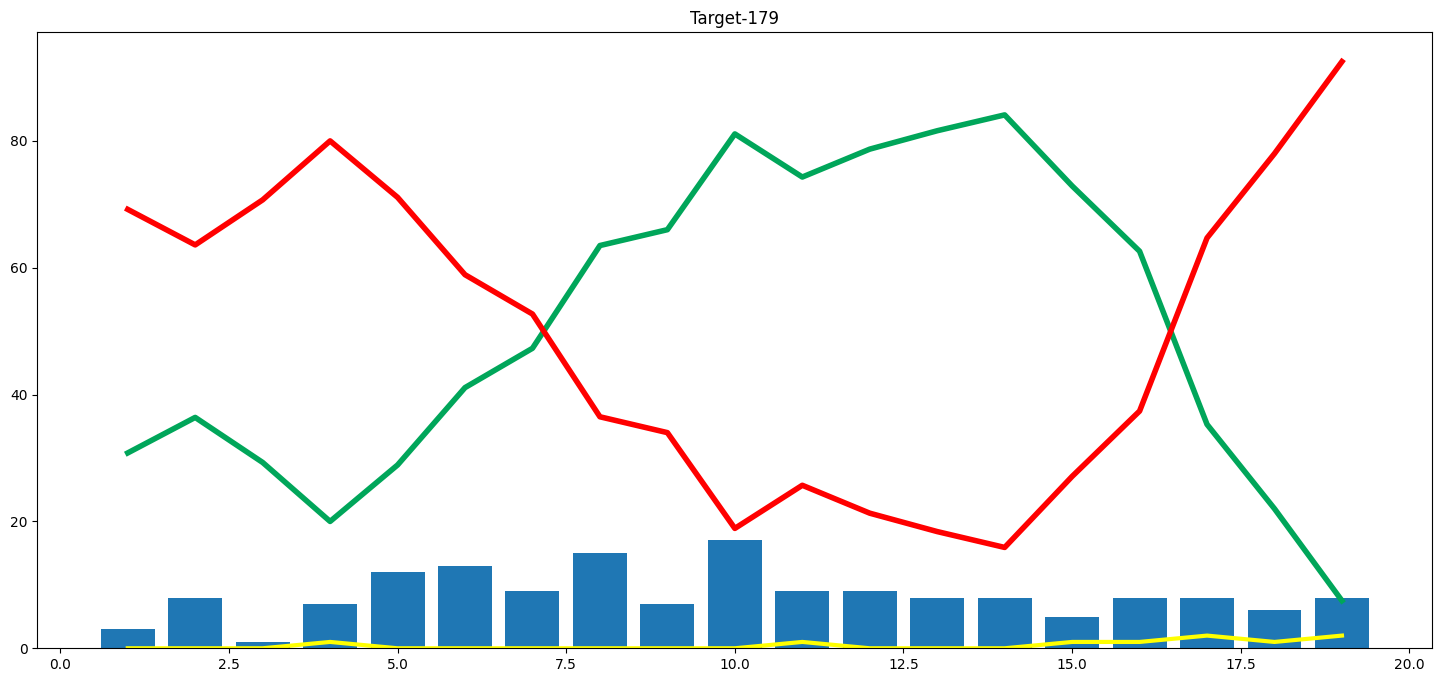

In [57]:

plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='#00a65a',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.title('Target-' + str(target))

In [58]:
temp_df,target = match_progression(delivery_df,74,pipe_randforest)
temp_df


Target- 179


,end_of_over,runs_after_over,wickets_in_over,lose,win
7161,1,3,0,100.0,0.0
7169,2,8,0,100.0,0.0
7175,3,1,0,98.0,2.0
7181,4,7,1,100.0,0.0
7187,5,12,0,99.0,1.0
7193,6,13,0,95.0,5.0
7199,7,9,0,100.0,0.0
7207,8,15,0,99.0,1.0
7213,9,7,0,99.0,1.0
7220,10,17,0,98.0,2.0


Text(0.5, 1.0, 'Target-179')

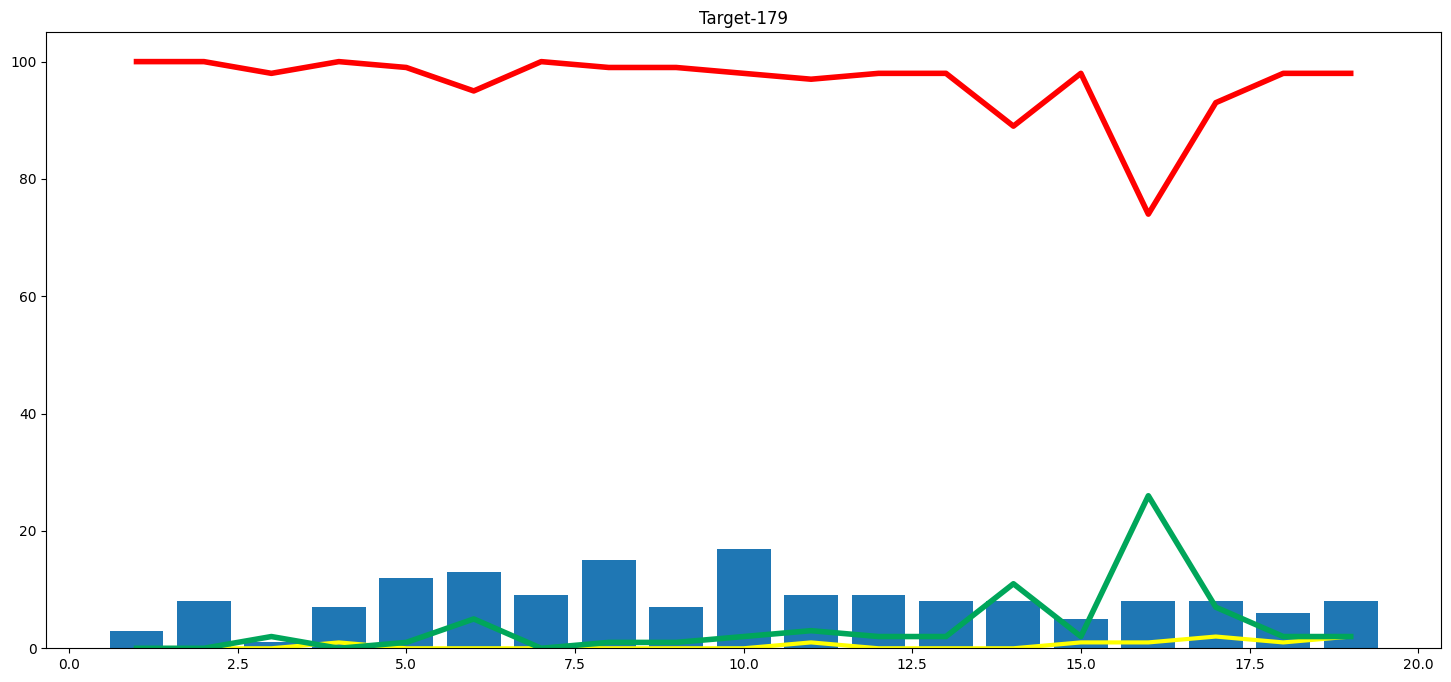

In [59]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='#00a65a',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.title('Target-' + str(target))

In [60]:
temp_df,target = match_progression(delivery_df,74,pipe_knn)
temp_df


Target- 179


,end_of_over,runs_after_over,wickets_in_over,lose,win
7161,1,3,0,100.0,0.0
7169,2,8,0,85.7,14.3
7175,3,1,0,85.7,14.3
7181,4,7,1,100.0,0.0
7187,5,12,0,85.7,14.3
7193,6,13,0,71.4,28.6
7199,7,9,0,85.7,14.3
7207,8,15,0,71.4,28.6
7213,9,7,0,85.7,14.3
7220,10,17,0,71.4,28.6


Text(0.5, 1.0, 'Target-179')

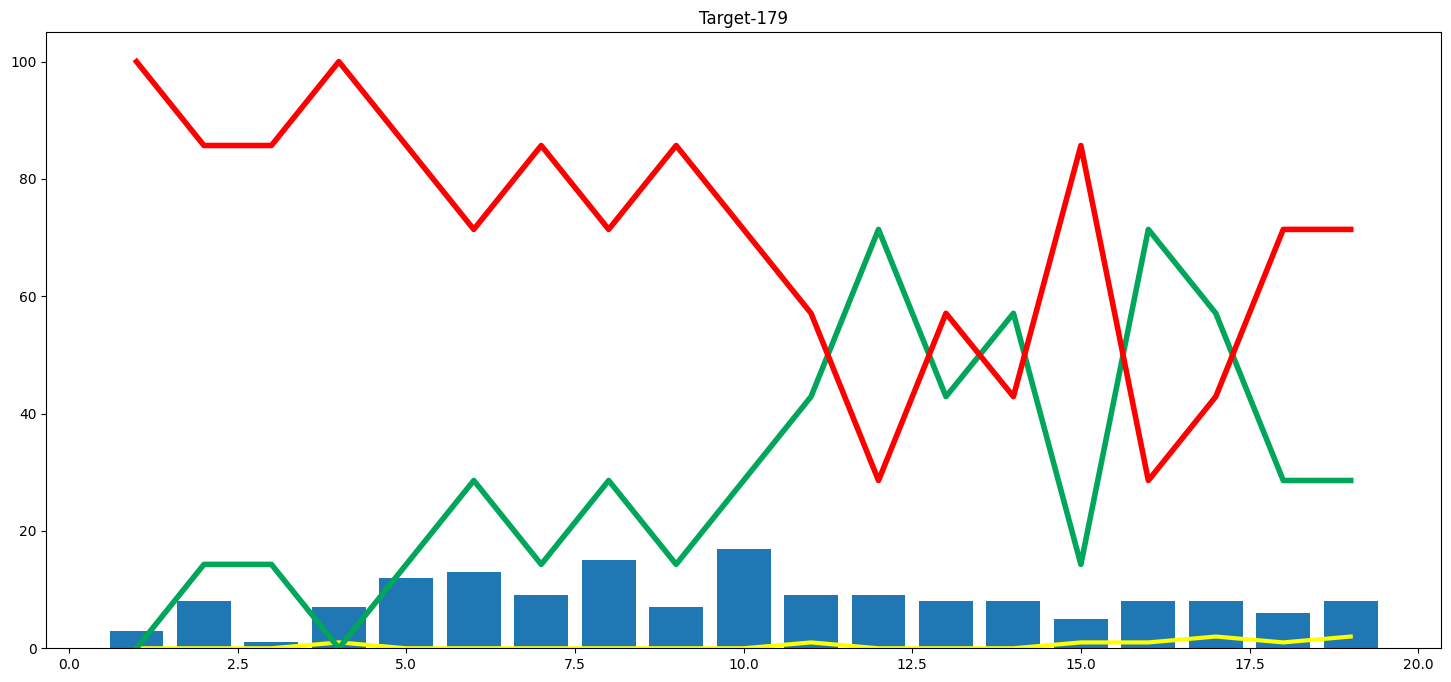

In [61]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='#00a65a',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.title('Target-' + str(target))

In [62]:
temp_df,target = match_progression(delivery_df,74,pipe_bnb)
temp_df


Target- 179


,end_of_over,runs_after_over,wickets_in_over,lose,win
7161,1,3,0,53.1,46.9
7169,2,8,0,53.1,46.9
7175,3,1,0,53.1,46.9
7181,4,7,1,53.1,46.9
7187,5,12,0,53.1,46.9
7193,6,13,0,53.1,46.9
7199,7,9,0,53.1,46.9
7207,8,15,0,53.1,46.9
7213,9,7,0,53.1,46.9
7220,10,17,0,53.1,46.9


Text(0.5, 1.0, 'Target-179')

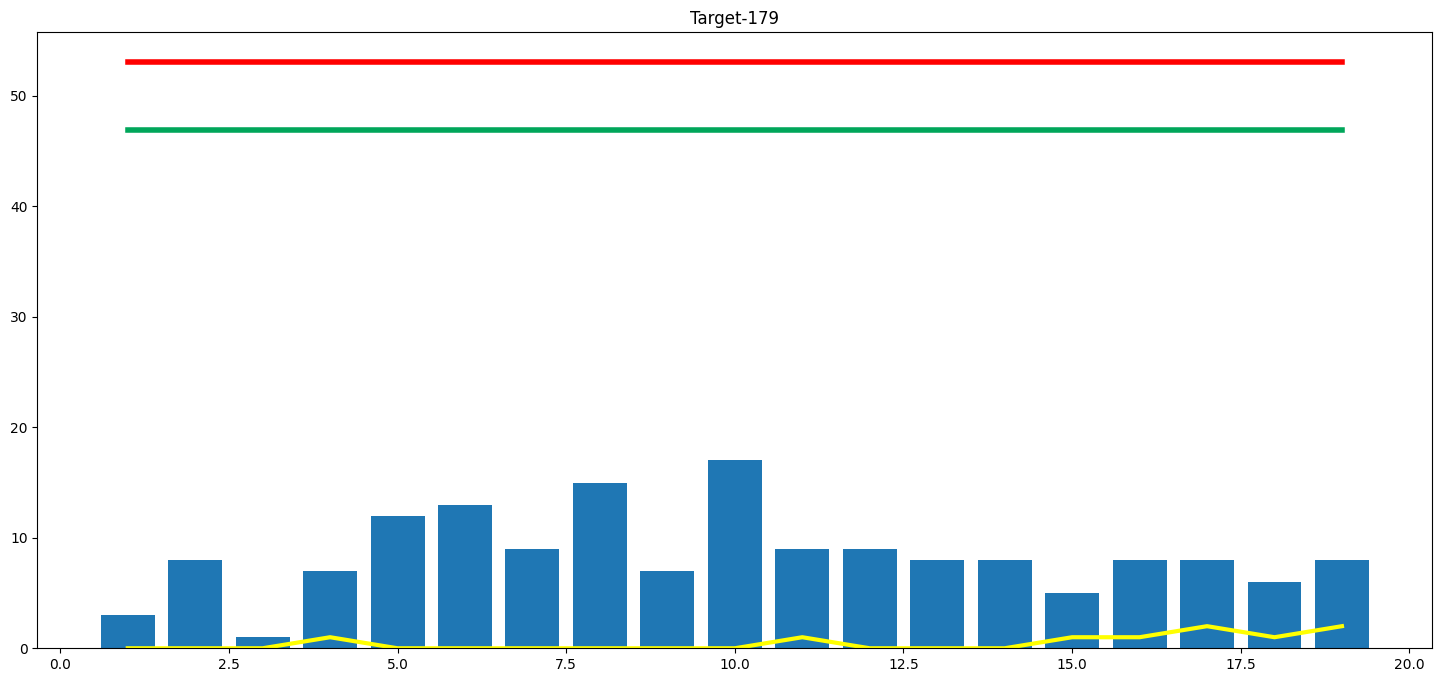

In [63]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='#00a65a',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.title('Target-' + str(target))

In [64]:
delivery_df['city'].unique()

array(['Hyderabad', 'Bangalore', 'Mumbai', 'Kolkata', 'Delhi', 'Chennai',
       'Jaipur', 'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Visakhapatnam', 'Pune',
       'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah', nan, 'Bengaluru'],
      dtype=object)

In [65]:
import pickle
pickle.dump(pipe_logreg , open('pipe_logreg.pkl' , 'wb'))
pickle.dump(pipe_randforest , open('pipe_randforest.pkl' , 'wb'))

In [66]:
teams


['Mumbai Indians',
 'PKings XI Punjab',
 'Chennai Super Kings',
 'Royal Challengers Bangalore',
 'Kolkata Knight Riders',
 'Rajasthan Royals',
 'Delhi Capitals',
 'Sunrisers Hyderabad']

In [67]:
final_df

,batting_team,bowling_team,city,runs_left,wickets,total_runs_x,balls_left,crr,rrr,result
26969,Chennai Super Kings,Delhi Daredevils,Delhi,131,9,186,84,9.333333,9.357143,1
44288,Delhi Daredevils,Kolkata Knight Riders,Kolkata,19,8,98,62,8.275862,1.838710,1
13731,Rajasthan Royals,Mumbai Indians,Jaipur,101,8,146,79,6.731707,7.670886,1
83205,Mumbai Indians,Royal Challengers Bangalore,Mumbai,56,4,236,7,9.610619,48.000000,0
7737,Royal Challengers Bangalore,Delhi Daredevils,Delhi,58,7,192,28,8.804348,12.428571,0
...,...,...,...,...,...,...,...,...,...,...
76781,Sunrisers Hyderabad,Royal Challengers Bangalore,Bangalore,153,10,167,115,18.000000,7.982609,1
77038,Rajasthan Royals,Mumbai Indians,Ahmedabad,133,9,165,91,6.827586,8.769231,1
37293,Mumbai Indians,Royal Challengers Bangalore,Bangalore,135,10,141,114,7.000000,7.105263,1
76828,Sunrisers Hyderabad,Royal Challengers Bangalore,Bangalore,81,9,167,69,10.235294,7.043478,1


In [68]:
xdf = final_df.drop('result' , axis = 1)
ydf = final_df['result']

In [69]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
  
# Passing encoded columns
  
enc_data = pd.DataFrame(enc.fit_transform(
    final_df[['city', 'batting_team' , 'bowling_team']]).toarray())
  
x_trainpca  , y_trainpca, x_testpca  , y_testpca =  train_test_split(xdf , ydf , test_size = 0.2 , random_state = 42)


In [70]:
x_trainpca.corr()

C:\Users\Ashitosh\AppData\Local\Temp\ipykernel_15880\610315515.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  x_trainpca.corr()


,runs_left,wickets,total_runs_x,balls_left,crr,rrr
runs_left,1.000000,0.486994,0.397892,0.840183,-0.206408,-0.038539
wickets,0.486994,1.000000,-0.163670,0.747574,0.039282,-0.337385
total_runs_x,0.397892,-0.163670,1.000000,-0.069041,0.271616,0.243255
balls_left,0.840183,0.747574,-0.069041,1.000000,-0.173469,-0.230241
crr,-0.206408,0.039282,0.271616,-0.173469,1.000000,-0.011120
rrr,-0.038539,-0.337385,0.243255,-0.230241,-0.011120,1.000000


C:\Users\Ashitosh\AppData\Local\Temp\ipykernel_15880\1548501667.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = x_trainpca.corr()


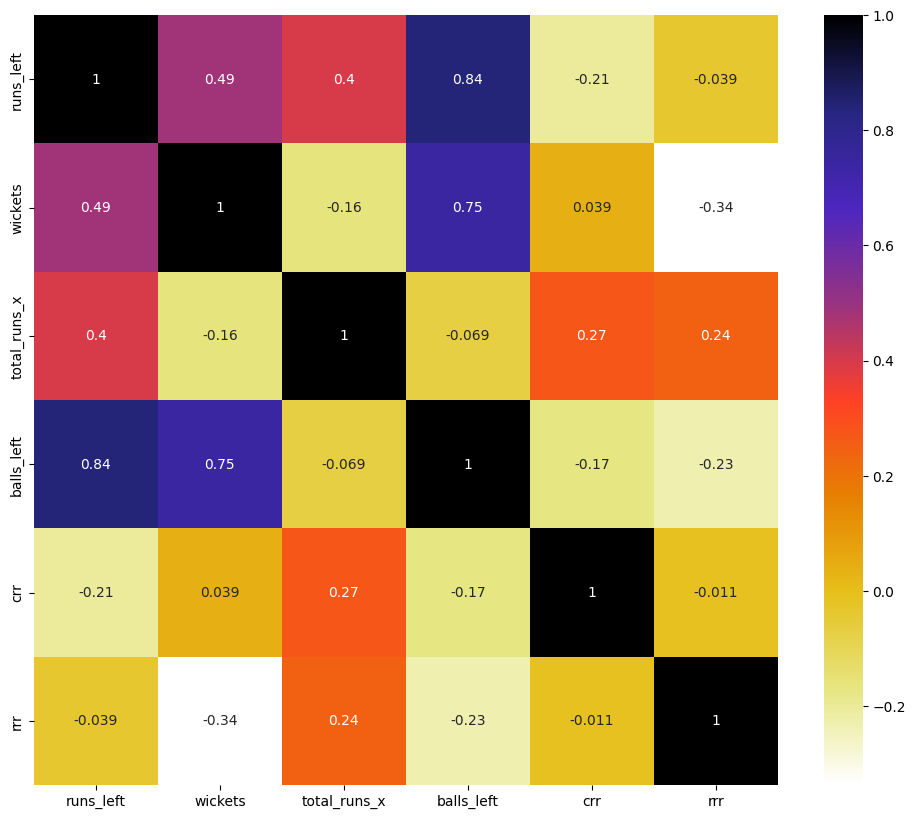

In [71]:
# doing correlation relation on the data - Pearson correlation

import seaborn as sns
plt.figure(figsize = (12 , 10))
cor = x_trainpca.corr()
sns.heatmap(cor , annot = True , cmap = plt.cm.CMRmap_r)
plt.show()

In [72]:
# with the function we are trying to get the correlation given a threshold

def correlation(dataset , threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if(abs(corr_matrix.iloc[i , j] )> threshold):
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

    

In [73]:
corr_features = correlation(x_trainpca , 0.5)

C:\Users\Ashitosh\AppData\Local\Temp\ipykernel_15880\3061042084.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = dataset.corr()


In [74]:
corr_features

{'balls_left'}

We can see that balls left has the highest correlation(both negative and positive)

In [75]:
x_trainpca.cov()

C:\Users\Ashitosh\AppData\Local\Temp\ipykernel_15880\874512710.py:1: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  x_trainpca.cov()


,runs_left,wickets,total_runs_x,balls_left,crr,rrr
runs_left,2434.763723,51.349706,565.606188,1375.922060,-23.068875,-26.621779
wickets,51.349706,4.566384,-10.075702,53.019044,0.190132,-10.093063
total_runs_x,565.606188,-10.075702,829.929365,-66.011819,17.723453,98.105550
balls_left,1375.922060,53.019044,-66.011819,1101.496562,-13.040247,-106.975937
crr,-23.068875,0.190132,17.723453,-13.040247,5.130308,-0.352605
rrr,-26.621779,-10.093063,98.105550,-106.975937,-0.352605,195.985019


C:\Users\Ashitosh\AppData\Local\Temp\ipykernel_15880\676184475.py:3: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cov = x_trainpca.cov()


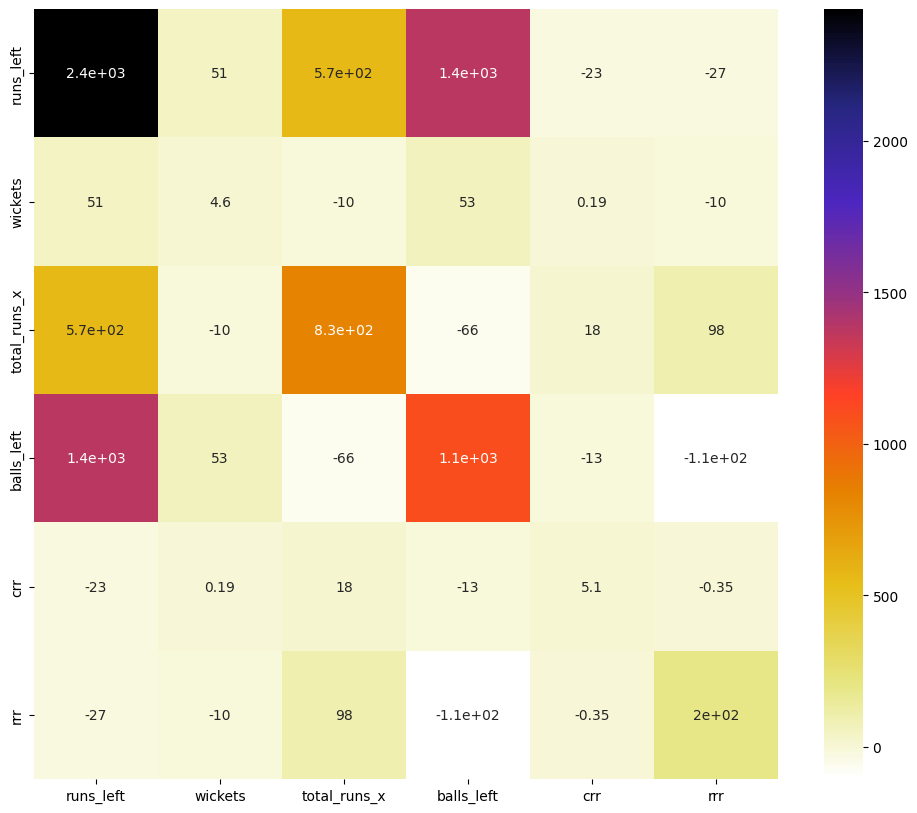

In [76]:
import seaborn as sns
plt.figure(figsize = (12 , 10))
cov = x_trainpca.cov()
sns.heatmap(cov , annot = True , cmap = plt.cm.CMRmap_r)
plt.show()

In [78]:
from sklearn.decomposition import PCA

In [79]:
pca = PCA()